In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.semi_supervised import LabelSpreading

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

Iteration 0 ______________________________________________________________________
Label Spreading model: 10 labeled & 320 unlabeled (330 total)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.53      0.86      0.66        29
           2       0.83      0.97      0.90        31
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        27
           5       0.84      0.46      0.59        35
           6       0.85      0.97      0.91        40
           7       0.69      0.92      0.79        36
           8       0.56      0.76      0.64        33
           9       0.41      0.86      0.55        37

    accuracy                           0.62       320
   macro avg       0.47      0.58      0.50       320
weighted avg       0.51      0.62      0.54       320

Confusion matrix
[[25  3  0  0  0  0  1]
 [ 1 30  0  0  0  0  0]
 [ 0  0 16  7  0  2 10]
 [ 1  0

/Users/erka/projects/spi/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/erka/projects/spi/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/erka/projects/spi/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

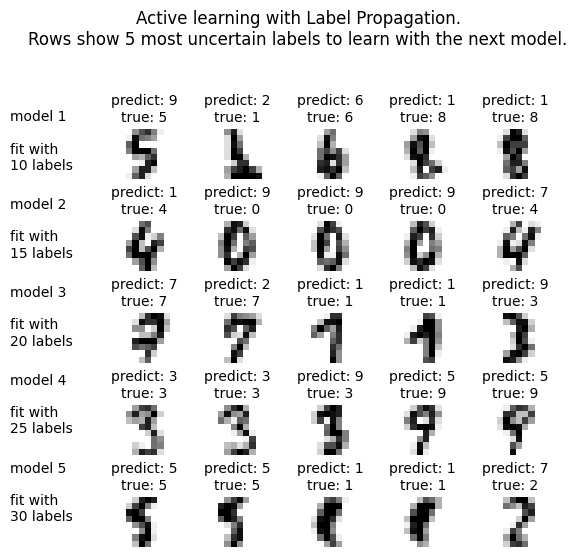

In [2]:
# Comments to be provided
X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

# Comments to be provided
n_total_samples = len(y)
n_labeled_points = 10
max_iterations = 5

# Comments to be provided
unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
f = plt.figure()
# Comments to be provided
for i in range(max_iterations):
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    # Comments to be provided
    y_train[unlabeled_indices] = -1

    # Comments to be provided
    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    lp_model.fit(X, y_train)

    # Comments to be provided
    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]

    cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print(
        "Label Spreading model: %d labeled & %d unlabeled (%d total)"
        % (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples)
    )

    print(classification_report(true_labels, predicted_labels))

    print("Confusion matrix")
    print(cm)

    # Comments to be provided
    pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

    # Comments to be provided
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.isin(uncertainty_index, unlabeled_indices)
    ][:5]

    # keep track of indices that we get labels for
    delete_indices = np.array([], dtype=int)
    if i < 5:
        f.text(
            0.05,
            (1 - (i + 1) * 0.183),
            "model %d\n\nfit with\n%d labels" % ((i + 1), i * 5 + 10),
            size=10,
        )
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation="none")
            sub.set_title(
                "predict: %i\ntrue: %i"
                % (lp_model.transduction_[image_index], y[image_index]),
                size=10,
            )
            sub.axis("off")

        # labeling 5 points, remote from labeled set
        (delete_index,) = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)

f.suptitle(
    (
        "Active learning with Label Propagation.\nRows show 5 most "
        "uncertain labels to learn with the next model."
    ),
    y=1.15,
)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2, hspace=0.85)
plt.show()


In [7]:
np.arange(20)[5:]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])